In [1]:
import pandas as pd
# use svg for better resolution
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np

# Data

In [2]:
# read medianLevel.csv
ngdp = pd.read_csv('medianLevel.csv')
ngdp['NGDP1'] = ngdp['NGDP1'].str.replace(',', '').astype(float)
ngdp['NGDP2'] = ngdp['NGDP2'].str.replace(',', '').astype(float)
ngdp['NGDP3'] = ngdp['NGDP3'].str.replace(',', '').astype(float)
ngdp['NGDP4'] = ngdp['NGDP4'].str.replace(',', '').astype(float)
ngdp['NGDP5'] = ngdp['NGDP5'].str.replace(',', '').astype(float)
ngdp['NGDP6'] = ngdp['NGDP6'].str.replace(',', '').astype(float)

# date when the survey was conducted
# make date from YEAR and QUARTER
ngdp['survey_date'] = pd.to_datetime(ngdp['YEAR'].astype(str) + 'Q' + ngdp['QUARTER'].astype(str))
# set index
ngdp = ngdp.set_index('survey_date')
ngdp.tail()

,YEAR,QUARTER,NGDP1,NGDP2,NGDP3,NGDP4,NGDP5,NGDP6,NGDPA,NGDPB
survey_date,,,,,,,,,,
2021-10-01,2021,4,23173.5,23660.14,24108.60,24513.88,24845.88,25150.26,"22,901.52","24,666.80"
2022-01-01,2022,1,23992.4,24344.46,24801.71,25161.03,25475.40,25782.38,"24,934.05","26,233.26"
2022-04-01,2022,2,24382.7,24815.65,25203.14,25530.14,25880.95,26194.55,"24,960.94","26,366.38"
2022-07-01,2022,3,24851.8,25257.41,25568.30,25900.23,26148.03,26433.71,"25,004.17","26,298.63"
2022-10-01,2022,4,25663.3,26027.62,26286.29,26492.86,26732.37,26978.16,"25,415.29","26,550.53"


![](https://i.stack.imgur.com/aTCOs.png)

In [3]:
recessions = pd.read_csv('JHDUSRGDPBR.csv')
recessions['DATE'] = pd.to_datetime(recessions['DATE'])
# rename columns
recessions.rename(columns={'DATE': 'DATE', 'JHDUSRGDPBR': 'IN_RECESSION'}, inplace=True)
# add three months
recessions['DATE_END'] = recessions['DATE'] + pd.DateOffset(months=3)
recessions.head()

,DATE,IN_RECESSION,DATE_END
0,1967-10-01,0.0,1968-01-01
1,1968-01-01,0.0,1968-04-01
2,1968-04-01,0.0,1968-07-01
3,1968-07-01,0.0,1968-10-01
4,1968-10-01,0.0,1969-01-01


## How accurate are GDP forecasts?

### Chart analysis

In [4]:
def plot_actual_vs_forecast(actual, forecast, title, zoom=1):
    # scatter plot actual vs forecast using shallow black circles
    plt.scatter(actual, forecast, c='k', alpha=0.2)
    # use -40 to 40 for x and y axis
    plt.axis([-40*zoom, 40*zoom, -40*zoom, 40*zoom])
    
    # plot horizontal line at y=0 with line width = 1
    plt.plot([-40, 40], [0, 0], 'k', lw=0.5)
    # plot vertical line at x=0 with line width = 1
    plt.plot([0, 0], [-40, 40], 'k', lw=0.5)
    # plot 45 degree line with line width = 1
    plt.plot([-40, 40], [-40, 40], 'k', lw=0.5)
    # label top left corner with text "IV" using font style Time New Roman, size 12
    plt.text(-38*zoom, 35*zoom, 'IV', fontname='Times New Roman', fontsize=12)
    # label top right corner with text "I" using font style Time New Roman, size 12
    plt.text(2*zoom, 35*zoom, 'I', fontname='Times New Roman', fontsize=12)
    # label bottom left corner with text "III" using font style Time New Roman, size 12
    plt.text(-38*zoom, -5*zoom, 'III', fontname='Times New Roman', fontsize=12)
    # label bottom right corner with text "II" using font style Time New Roman, size 12
    plt.text(2*zoom, -5*zoom, 'II', fontname='Times New Roman', fontsize=12)
    plt.xlabel('Actual GDP growth rate')
    plt.ylabel('Forecast GDP growth rate')
    # title
    plt.title(title)
    # plt.show()

def get_actual_growth(ngdp, period=1):
    actual = ngdp.NGDP1.pct_change(period)
    actual.dropna(inplace=True)
    actual.index = actual.index - pd.DateOffset(months=3)
    return actual

def get_forecasted_growth(ngdp, period=1):
    forecast = ngdp['NGDP' + str(period+1)]/ngdp.NGDP1 - 1
    if period > 1:
        forecast.index = forecast.index + pd.DateOffset(months=(period-1)*3)
    return forecast

def get_growth_with_forecast(ngdp, period=1):
    actual = get_actual_growth(ngdp, period)
    forecast = get_forecasted_growth(ngdp, period)
    growth = pd.concat([actual, forecast], axis=1).dropna()
    growth.columns = ['actual', 'forecast']
    return growth

In [5]:
growth = get_growth_with_forecast(ngdp, 1)

In [6]:
growth_yearly = get_growth_with_forecast(ngdp, 4)

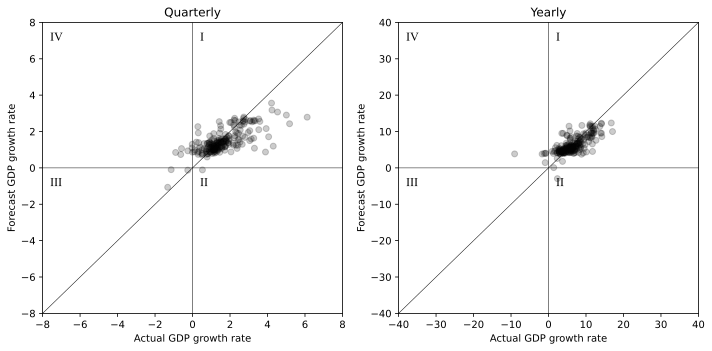

In [7]:
# set figure size
plt.figure(figsize=(10, 5))
# subplot 1,2
plt.subplot(1, 2, 1)
plot_actual_vs_forecast((growth.actual*100), (growth.forecast*100), 'Quarterly', zoom=0.2)
# subplot 1,2
plt.subplot(1, 2, 2)
plot_actual_vs_forecast((growth_yearly.actual*100), (growth_yearly.forecast*100), 'Yearly')
# tight layout
plt.tight_layout()
plt.show()

Points are mostly clustered in quadrant I, which indicates that forecasters correctly guessed the upward direction of growth. The scatter plot also clusters around the diagonal line, which indicates that forecasters are generally accurate in predicting the magnitude of growth. Somewhat surprisingly, the yearly GDP growth forecasts are more accurate than the quarterly forecasts.

I wonder how the absolute error between the forecast and the actual value look against time. Specifcally, what happens to it during recessions?

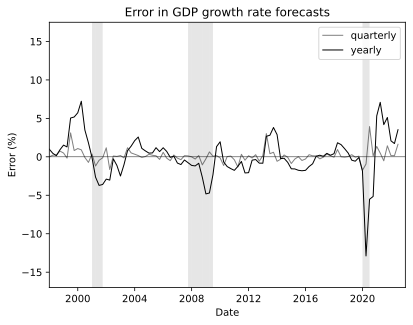

In [8]:
def absolute_error(actual, forecast):
    return abs(actual - forecast)

def error(actual, forecast):
    return actual - forecast

abs_error_q = error(growth.actual, growth.forecast)
abs_error_y = error(growth_yearly.actual, growth_yearly.forecast)
plt.plot((abs_error_q * 100), color='k', lw=1, label='quarterly', alpha=0.5)
plt.plot((abs_error_y * 100), color='k', lw=1, label='yearly')
# plot horizontal line
plt.axhline(y=0, color='k', lw=0.5)
# select x-axis range from 1998 to 2013
plt.xlim(pd.Timestamp('1998-01-01'), pd.Timestamp('now'))
# select y-axis range from -2 to 17.5
plt.ylim(-17, 17.5)
plt.xlabel('Date')
plt.ylabel('Error (%)')
plt.title('Error in GDP growth rate forecasts')
plt.legend()

# plot recession bars
for i in range(len(recessions)):
    if recessions.IN_RECESSION[i] == 1:
        plt.axvspan(recessions.DATE[i], recessions.DATE_END[i], facecolor='k', alpha=0.1)
plt.show()

In [9]:
growth_yearly['1998':].actual.median()*100

4.279841194081668

So a median growth of the US GDP since 1998 was 4.2% per year. Whilst the forecasting errors made during recessions were >=5%.

### Comparison with time series models

In order to compare the accuracy of analysts' made GDP forecasts and time series models a median, mean absolute error (MAE) and root mean squared error (RMSE) were calculated for each estimate. The RMSE tends to punish large errors more, which seems the most appropriate metric for this task, since large errors are costliest.

In [10]:
def descriptive_stats(df):
    error = df.actual - df.forecast
    mae = np.mean(abs(error))
    median = error.median()
    # compute rmse
    rmse = np.sqrt(np.mean(error**2))
    # return pandas series from mean and median
    return pd.Series([median, mae, rmse], index=['median', 'mae', 'rmse'])

def rw_model(x):
    x = pd.DataFrame(x)
    # set column name
    x.columns = ['actual']
    x['forecast'] = x.actual.shift(1)
    # drop na
    x.dropna(inplace=True)
    return x

# create exponential rolling median
def ewm_model(x, a=0.3):
    x = pd.DataFrame(x)
    # set column name
    x.columns = ['actual']
    x['forecast'] = x.actual.ewm(alpha=a).mean()
    # drop na
    x.dropna(inplace=True)
    return x

actual_growth = [get_actual_growth(ngdp, i) for i in range(1,5)]

In [11]:
analysts_stats = []
for i in range(1,5):
    analyst_forecast = get_growth_with_forecast(ngdp, i)
    stats_i = descriptive_stats(analyst_forecast)*100
    analysts_stats.append(stats_i.to_frame().T)

# concat stats
analysts_stats = pd.concat(analysts_stats, axis=0)
analysts_stats.index = ['1Q', '2Q', '3Q', '4Q']
analysts_stats['strategy'] = 'analysts'
analysts_stats = analysts_stats.reset_index().set_index(['strategy', 'index'])

In [12]:
rw_stats = []
for i in range(4):
    rw_forecast = rw_model(actual_growth[i])
    stats_i = descriptive_stats(rw_forecast)*100
    rw_stats.append(stats_i.to_frame().T)

# concat stats
rw_stats = pd.concat(rw_stats, axis=0)
rw_stats.index = ['1Q', '2Q', '3Q', '4Q']
rw_stats['strategy'] = 'random walk'
# index by strategy
rw_stats = rw_stats.reset_index().set_index(['strategy', 'index'])

In [13]:
# concat stats
stats = pd.concat([analysts_stats, rw_stats], axis=0)
stats

median       mae      rmse
strategy    index                              
analysts    1Q     0.121762  0.548478  0.832078
            2Q     0.123378  1.011915  1.599966
            3Q     0.208964  1.434745  2.041426
            4Q     0.239091  1.808562  2.472917
random walk 1Q    -0.031537  1.017884  1.928597
            2Q    -0.046603  1.113330  1.918272
            3Q    -0.011857  1.139498  1.944615
            4Q    -0.081377  1.183964  2.010363

MAE of a naive random walk model is better for 3-4Q horizons and close in accuracy to 2Q horizon. Analysts outperform the RW model only when it comes to the next quarter's forecast. RMSE describes the same situation.

### ARMA

In [18]:
#import adfuller test
from statsmodels.tsa.stattools import adfuller
# dickey-fuller test
def adf_test(x):
    # compute adf
    adf = adfuller(x)
    # print results
    print('ADF Statistic: %f' % adf[0])
    print('p-value: %f' % adf[1])

adf_test(get_actual_growth(ngdp))

ADF Statistic: -6.436064
p-value: 0.000000


c:\Users\mmili\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


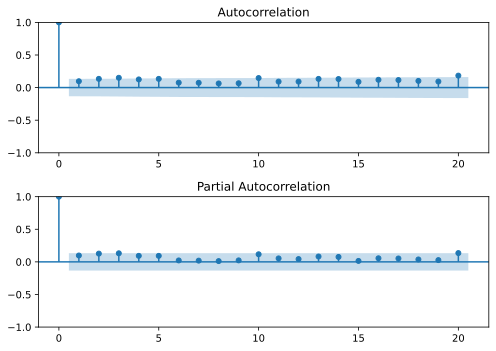

In [25]:
# import plot_acf and plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot acf and pacf as subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5))
plot_acf(get_actual_growth(ngdp), lags=20, ax=ax1)
plot_pacf(get_actual_growth(ngdp), lags=20, ax=ax2)
# set tight layout
plt.tight_layout()
plt.show()

Whilst the GDP growth time series is stationary, it looks like ARMA won't be useful at predicting GDP growth. This is because there is no autocorrelation in the data. Maybe some non-linear model (e.g. Neural Networks) would be more appropriate?